In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm

%matplotlib inline

We conduct points 1 to 4 with FB15K-237 and TransE on the strategies TRIANGLES and RANDOM UNIFORM to determine the behaviour of both parameters. We chose them for our initial experiments as they are a popular benchmark dataset and embedding model, respectively. 

In the experiments, we observe the runtime, which we further divide to generation time and evaluation time, the amount of extracted facts, the evaluation metrics MRR, Hits@3 and Hits@10, and the metric facts/hour to measure the fact generation rate.

In [2]:
# parameters excel sheet random
data_random = pd.read_excel("Parameters.xlsb.xlsx", sheet_name=5, skiprows=1)
data_random = data_random.iloc[:, 3:]
data_random

,top_n,max_candidates,total time,gen time,eval time,generated candidates,mr,mrr,hits@3,hits@10,#gen/tot_time
0,100.0,50,3238.325765,1472.598733,1764.911353,2,83.250000,0.012324,0,0,2.223371
1,NaN,100,3805.921218,2025.062895,1780.033514,12,62.041667,0.020767,0,0,11.350734
2,NaN,200,4678.307075,2875.453808,1801.973834,23,66.326087,0.019109,0,0,17.698710
3,NaN,300,5626.959674,3732.898872,1893.192592,34,69.367647,0.017539,0,0,21.752422
4,NaN,400,6891.311126,4883.545676,2006.905131,39,68.846154,0.017397,0,0,20.373482
5,NaN,500,7779.671869,5659.163736,2119.624526,80,67.150000,0.017232,0,0,37.019556
6,NaN,700,9438.441774,7170.125906,2267.479385,98,67.474490,0.017160,0,0,37.379051
7,200.0,50,3240.132766,1469.765259,1769.489168,3,104.833333,0.010468,0,0,3.333197
8,NaN,100,3805.059625,1996.815539,1807.427581,28,113.000000,0.012798,0,0,26.491043
9,NaN,200,4710.273466,2863.444597,1845.918196,71,125.795775,0.010756,0,0,54.264365


In [3]:
# parameters excel sheet triangles
data_triangles = pd.read_excel("Parameters.xlsb.xlsx", sheet_name=4, skiprows=1)
data_triangles = data_triangles.iloc[:, 3:]
data_triangles

,top_n,max_candidates,total time,gen time,eval time,generated candidates,mr,mrr,hits@3,hits@10,#gen/gen_time,#gen/tot_time,gen:eval,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,100.0,50,6291.371186,4532.851508,1757.662366,7,78.000000,0.013332,0.000000,0.000000,5.559414,4.005486,2.578909,NaN,NaN,NaN,NaN,NaN
1,NaN,100,6887.500403,5061.586007,1825.065962,654,38.874618,0.038556,0.006116,0.032110,465.150646,341.836641,2.773372,NaN,NaN,NaN,NaN,NaN
2,NaN,200,7764.263473,5896.396017,1866.976411,1700,44.100000,0.040608,0.004118,0.061765,1037.922145,788.226729,3.158260,NaN,NaN,NaN,NaN,NaN
3,NaN,300,8620.207196,6740.291997,1878.995965,3393,43.109195,0.039538,0.003831,0.067197,1812.206356,1416.996102,3.587177,NaN,NaN,NaN,NaN,NaN
4,NaN,400,9868.770212,7911.525700,1956.242064,5546,42.567256,0.039931,0.002885,0.070862,2523.609321,2023.109219,4.044247,NaN,NaN,NaN,NaN,NaN
5,NaN,500,10725.698071,8698.545989,2026.077190,6580,42.309195,0.046876,0.016565,0.094225,2723.213745,2208.527580,4.293294,NaN,NaN,NaN,NaN,NaN
6,NaN,700,12450.562006,10244.203631,2205.260580,7683,42.093909,0.045691,0.013667,0.087206,2699.946330,2221.490081,4.645348,NaN,NaN,NaN,NaN,NaN
7,NaN,900,14289.702238,11933.106204,2355.521417,7718,43.194092,0.045947,0.013475,0.093159,2328.379512,1944.393210,5.066015,NaN,NaN,NaN,NaN,NaN
8,200.0,50,6304.340844,4528.055077,1775.451399,72,162.958333,0.006637,0.000000,0.000000,57.243120,41.114528,2.550368,NaN,NaN,NaN,NaN,NaN
9,NaN,100,6873.443117,5057.637531,1814.957567,785,55.850955,0.033358,0.005096,0.026752,558.758903,411.147652,2.786642,NaN,NaN,NaN,NaN,NaN


1. TOP_N has little to no impact on runtime, i.e., generation time and evaluation time. As can be seen on the two graphs below, the different colored lines representing different top_n values are almost overlapping. This indicates that there are no significant changes with different TOP_N values.

This is due to the TOP_N value solely affecting the mask that is applied onto the generated facts. For instance, for TOP_N=100, we would filter out all extracted triples ranked over 100, and filter those over 200 for TOP_N=200. Such difference does not cause any changes during the masking process, and causes minimal changes when appending equal to or more triples (in TOP_N=200) than in TOP_N=100.

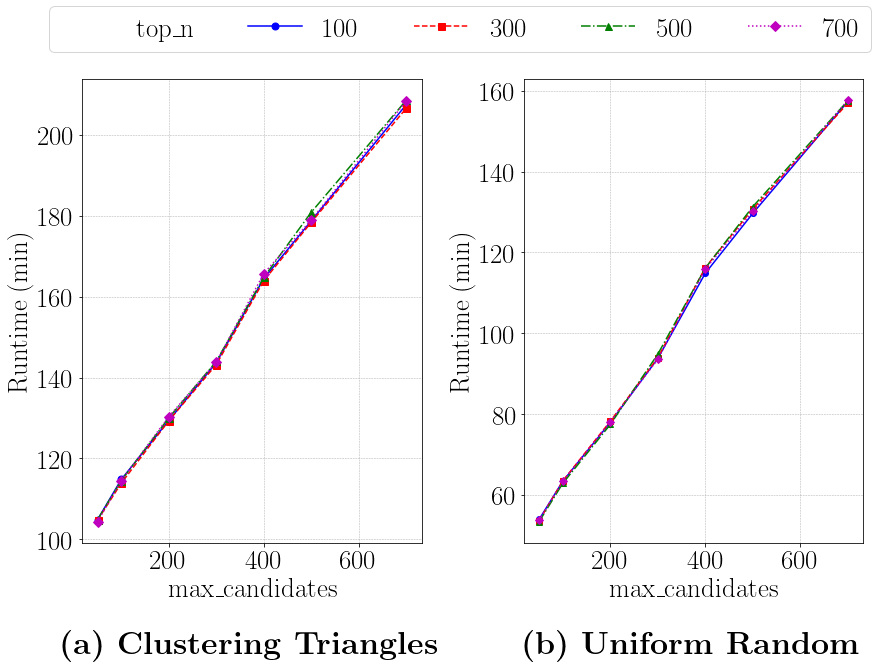

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Enable LaTeX mode for text
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=27)  # Set default font size to 19

# Adjust the figure ratio
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Data for the first plot
x = np.array([50, 100, 200, 300, 400, 500, 700])
y_100 = np.array([6291, 6888, 7764, 8620, 9869, 10726, 12451])/60
y_300 = np.array([6283, 6833, 7759, 8592, 9837, 10704, 12397])/60
y_500 = np.array([6292, 6871, 7802, 8641, 9886, 10854, 12516])/60
y_700 = np.array([6261, 6872, 7820, 8630, 9944, 10740, 12507])/60

# Line styles, markers, and colors
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']
colors = ['b', 'r', 'g', 'm']

# Plot data on ax1
lines = []
for idx, y in enumerate([y_100, y_300, y_500, y_700]):
    line, = ax1.plot(x, y, marker=markers[idx], color=colors[idx], linestyle=line_styles[idx], markersize=7)
    lines.append(line)

# Assuming data_random is already defined
# Plot data on ax2
ax2.plot(x, data_random['total time'][0:7] / 60, marker=markers[0], linestyle=line_styles[0], color=colors[0])
ax2.plot(x, data_random['total time'][14:21] / 60, marker=markers[1], linestyle=line_styles[1], color=colors[1])
ax2.plot(x, data_random['total time'][28:35] / 60, marker=markers[2], linestyle=line_styles[2], color=colors[2])
ax2.plot(x, data_random['total time'][35:42] / 60, marker=markers[3], linestyle=line_styles[3], color=colors[3])


# Setting title below the xlabel
ax1.set_title(r'\textbf{(a) Clustering Triangles}', loc='center', y=-0.25)
ax2.set_title(r'\textbf{(b) Uniform Random}', loc='center', y=-0.25)

# Setting labels and grid for both ax1 and ax2
for ax in [ax1, ax2]:
    ax.set_xlabel(r'max\_candidates')
    ax.set_ylabel(r'Runtime (min)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# labels = [r'100', r'300', r'500', r'700']
# fig.legend(handles=lines, labels=labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

# plt.tight_layout(pad=1.5)  # Increase padding between plots
# plt.show()

labels = [r'top\_n', r'100', r'300', r'500', r'700']
empty_handle = plt.Line2D([], [], color='none')  # Creating an empty handle for the 'top_n' label
handles = [empty_handle, *lines]

# Create the legend with the new handles and labels
# Adjust bbox_to_anchor and bbox_transform to make the legend box as wide as the plot
fig.legend(handles=handles, labels=labels, loc='upper center', ncol=5, 
           bbox_to_anchor=(0.5, 1.08), bbox_transform=fig.transFigure)

# Adjust subplots to make space for the legend
plt.subplots_adjust(top=0.93, wspace=0.3)

plt.show()


2. Increasing MAX_CANDIDATES heavily increases generation time and slightly increases evaluation time as can be seen on the plot above. With max_candidates = 700, the runtime reaches over 3.5 hours for triangles and 2.5 hours for random uniform. 

3. The overall quality of the extracted facts (measured by MRR) decreases with increased TOP_N, as can be seen from the monotonic decreasing function. On the other hand, the MRR remains relatively preserved with increasing MAX_CANDIDATES despite the fluctuation.

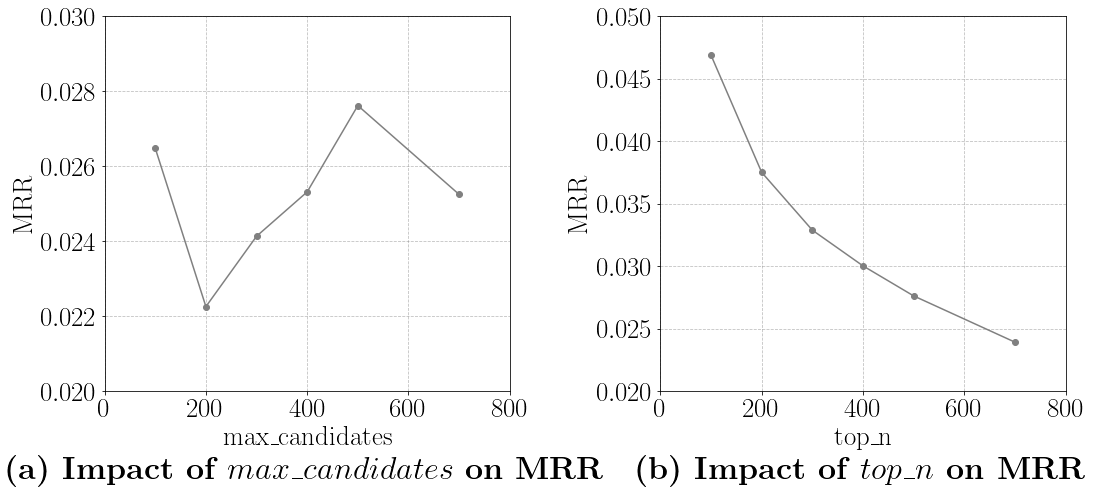

In [110]:
import matplotlib.pyplot as plt

# Ensure that LaTeX is used for text rendering
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 27

# Assuming data_triangles is already defined
# data_triangles = ...

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# First plot
y_r2 = [0.017232, 0.010468, 0.007093, 0.005738, 0.004793, 0.003520] # mrr of random with max=500
x1 = data_triangles['max_candidates'][31:37]
y1 = data_triangles['mrr'][31:37]
ax1.plot(x1, y1, marker='o', color='gray')
ax1.set_xlabel('max_candidates')
ax1.set_ylabel('MRR')
ax1.tick_params(axis='both', which='major')
ax1.set_xlim(left=0, right=800)
ax1.set_ylim(bottom=0.02, top= 0.03)
ax1.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

# Second plot
x2 = [100, 200, 300, 400, 500, 700]
y2 = [0.046876369, 0.037502759, 0.032875566, 0.030017644, 0.027614022, 0.02391198]
ax2.plot(x2, y2, marker='o', color='gray')
ax2.set_xlabel('top_n')
ax2.set_ylabel('MRR')
ax2.tick_params(axis='both', which='major')
ax2.set_xlim(left=0, right=800)
ax2.set_ylim(bottom=0.02, top= 0.05)
ax2.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

ax1.set_title(r'\textbf{(a) Impact of $max\_candidates$ on MRR}', loc='center', y=-0.25)
ax2.set_title(r'\textbf{(b) Impact of $top\_n$ on MRR}', loc='center', y=-0.25)

plt.tight_layout(pad=1.5)  # Increase padding between plots
plt.show()


5. From our initial experiments, we observed the fact generation rate per hour (fact/h). From this we determined TOP_N = 500 to be the elbow point of triangles, after which the fact/h metric does not change much. Although the same elbow point is not observable in random uniform, we lean towards triangles as producing the same trend with random uniform is not reliable (due to randomness).

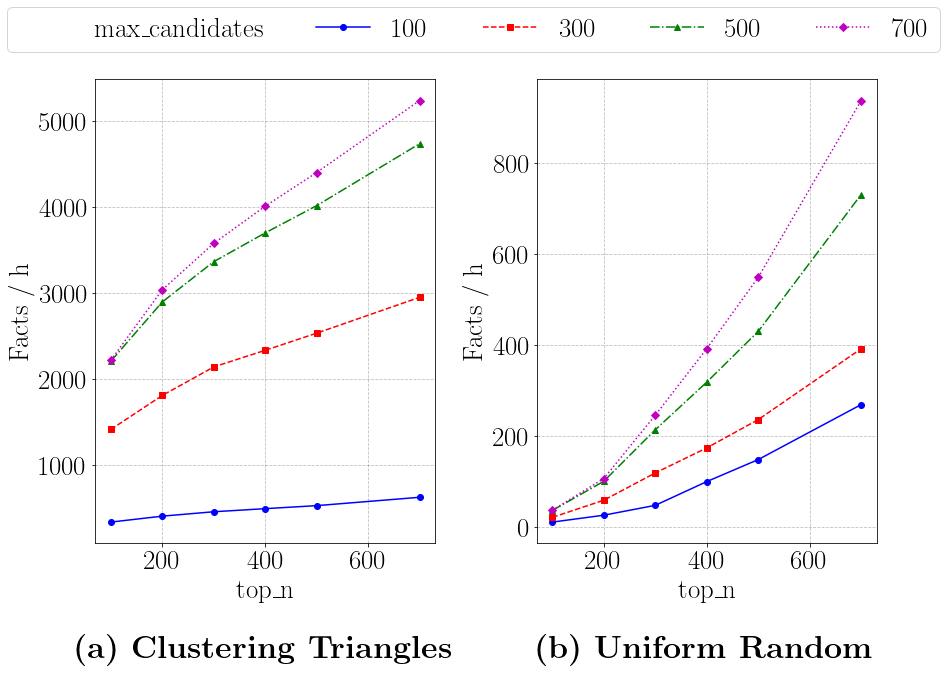

In [25]:
import matplotlib.pyplot as plt

# Set LaTeX for text rendering and font size
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 27

# Assuming data_random is already defined
# data_random = ...

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,8))

# Colors for consistent plotting
# Line styles, markers, and colors
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']
colors = ['b', 'r', 'g', 'm']

# First plot
ax1.plot([100, 200, 300, 400, 500, 700], [342, 411, 462, 498, 533, 630], label='mc=100', marker=markers[0], color=colors[0], linestyle=line_styles[0])
ax1.plot([100, 200, 300, 400, 500, 700], [1417, 1812, 2143, 2336, 2535, 2951], label='mc=300', marker=markers[1], color=colors[1], linestyle=line_styles[1])
ax1.plot([100, 200, 300, 400, 500, 700], [2209, 2897, 3365, 3699, 4015, 4734], label='mc=500', marker=markers[2], color=colors[2], linestyle=line_styles[2])
ax1.plot([100, 200, 300, 400, 500, 700], [2221, 3038, 3577, 4009, 4400, 5235], label='mc=700', marker=markers[3], color=colors[3], linestyle=line_styles[3])
ax1.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
ax1.set_xlabel('top_n')
ax1.set_ylabel('Facts / h')
ax1.tick_params(axis='both', which='major')

# Second plot
ax2.plot([100, 200, 300, 400, 500, 700], data_random['#gen/tot_time'][1::7], label='mc=100', marker=markers[0], color=colors[0], linestyle=line_styles[0])
ax2.plot([100, 200, 300, 400, 500, 700], data_random['#gen/tot_time'][3::7], label='mc=300', marker=markers[1], color=colors[1], linestyle=line_styles[1])
ax2.plot([100, 200, 300, 400, 500, 700], data_random['#gen/tot_time'][5::7], label='mc=500', marker=markers[2], color=colors[2], linestyle=line_styles[2])
ax2.plot([100, 200, 300, 400, 500, 700], data_random['#gen/tot_time'][6::7], label='mc=700', marker=markers[3], color=colors[3], linestyle=line_styles[3])
ax2.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
ax2.set_xlabel('top_n')
ax2.set_ylabel('Facts / h')
ax2.tick_params(axis='both', which='major')

# Titles
ax2.set_title(r'\textbf{(b) Uniform Random}', loc='center', y=-0.26)
ax1.set_title(r'\textbf{(a) Clustering Triangles}', loc='center', y=-0.26)

# fig.legend(handles=lines, labels=labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))

# plt.tight_layout(pad=1.5)  # Increase padding between plots
# plt.show()

from matplotlib.lines import Line2D

# Create custom legend
legend_labels = ['max_candidates', '100', '300', '500', '700']
legend_handles = [Line2D([0], [0], color='white')] + [Line2D([0], [0], marker=markers[i], color=colors[i], linestyle=line_styles[i], label=legend_labels[i+1]) for i in range(4)]

# Adjust the bbox_to_anchor value to position the legend
fig.legend(handles=legend_handles, labels=legend_labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.08))

# Adjust subplots to make space for the legend
plt.subplots_adjust(top=0.93, wspace=0.3)

plt.show()




Afterwards we conducted the same experiment with the same dataset and model on the strategies ENTITY FREQUENCY, GRAPH DEGREE, and CLUSTERING COEFFICIENT with TOP_N = 500 to further observe the behaviour of MAX_CANDIDATES.

6. After observing the results, we concluded that similarly, MAX_CANDIDATES = 500 is generally also the elbow point.

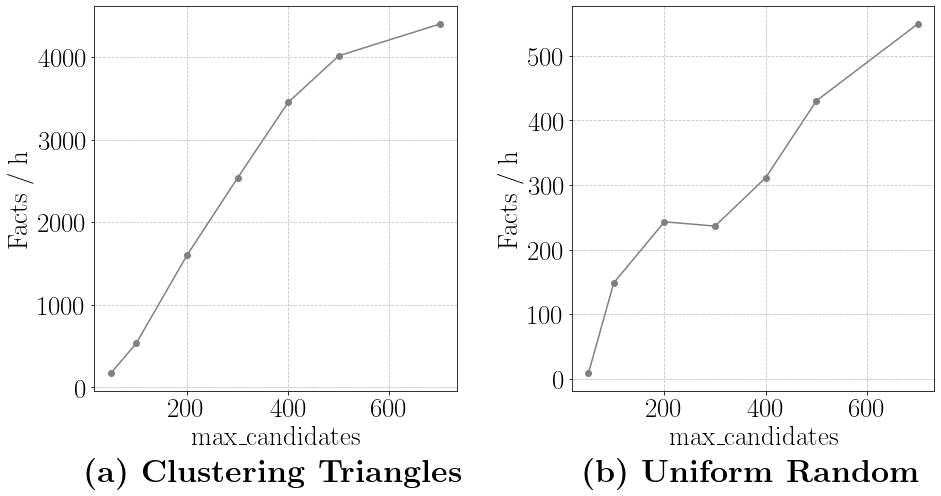

In [118]:
import matplotlib.pyplot as plt

# Set LaTeX for text rendering and font size
plt.rcParams["text.usetex"] = True
plt.rcParams["font.size"] = 27

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14,8))

# First plot
ax1.plot([50, 100, 200, 300, 400, 500, 700], data_triangles['#gen/tot_time'][30:37], label='top_n=500', marker='o', color='gray')
ax1.set_xlabel('max_candidates')
ax1.set_ylabel('Facts / h')
ax1.tick_params(axis='both', which='major')
ax1.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

# Second plot
ax2.plot([50, 100, 200, 300, 400, 500, 700], data_random['#gen/tot_time'][28:35], label='top_n=500', marker='o', color='gray')
ax2.set_xlabel('max_candidates')
ax2.set_ylabel('Facts / h')
ax2.tick_params(axis='both', which='major')
ax2.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

# Adjust the title position
ax1.set_title(r'\textbf{(a) Clustering Triangles}', loc='center', y=-0.25)
ax2.set_title(r'\textbf{(b) Uniform Random}', loc='center', y=-0.25)

plt.tight_layout(pad=1.5)  # Increase padding between plots
plt.show()


Following this, we ran discover_facts on all dataset and embedding model combination with MAX_CANDIDATES = TOP_N = 500 to compare and analyze the strategies.